# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [237]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage import morphology
from skimage.morphology import disk
from skimage.morphology import rectangle

from pylab import subplot


Pretty printing has been turned OFF


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

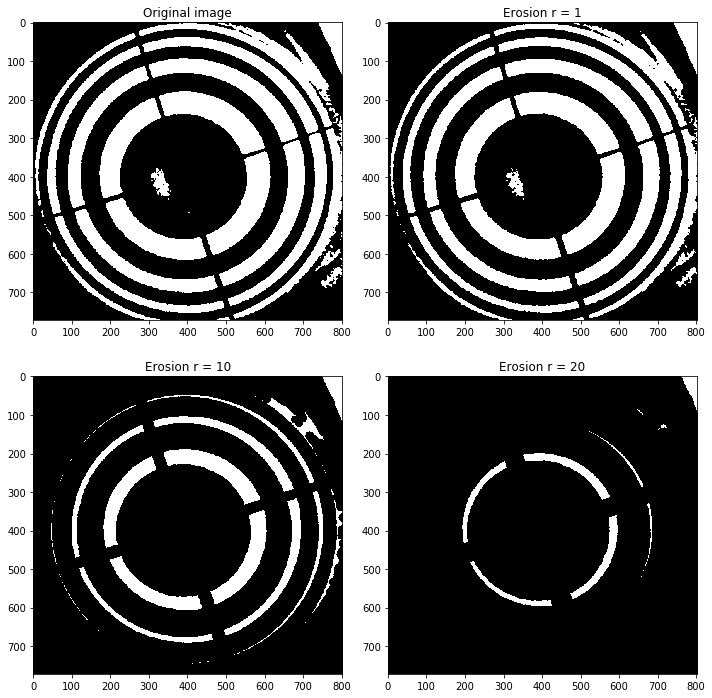

In [238]:
img_path = './images/'
img_name = 'FindingContours.png'
fc_im = io.imread(img_path.__add__(img_name))

fc_erosion01 = morphology.erosion(fc_im, disk(1))
fc_erosion10 = morphology.erosion(fc_im, disk(10))
fc_erosion20 = morphology.erosion(fc_im, disk(20))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
subplot(2,2,1)
io.imshow(fc_im)
plt.title('Original image')
subplot(2,2,2)
io.imshow(fc_erosion01)
plt.title('Erosion r = 1')
subplot(2,2,3)
io.imshow(fc_erosion10)
plt.title('Erosion r = 10')
subplot(2,2,4)
io.imshow(fc_erosion20)
plt.title('Erosion r = 20')

** Q.1.2 Dilation **

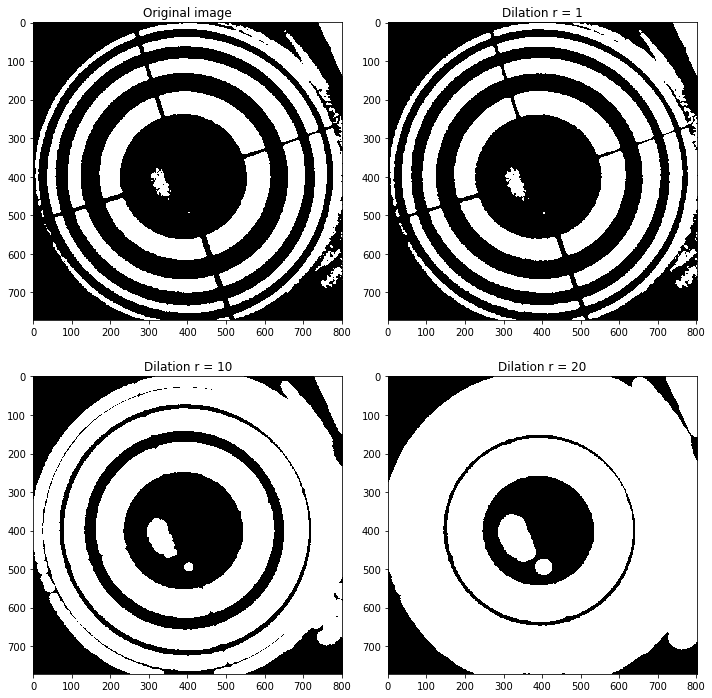

In [239]:
fc_dilation01 = morphology.dilation(fc_im, disk(1))
fc_dilation10 = morphology.dilation(fc_im, disk(10))
fc_dilation20 = morphology.dilation(fc_im, disk(20))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
subplot(2,2,1)
io.imshow(fc_im)
plt.title('Original image')
subplot(2,2,2)
io.imshow(fc_dilation01)
plt.title('Dilation r = 1')
subplot(2,2,3)
io.imshow(fc_dilation10)
plt.title('Dilation r = 10')
subplot(2,2,4)
io.imshow(fc_dilation20)
plt.title('Dilation r = 20')

** Q.1.3 Opening **

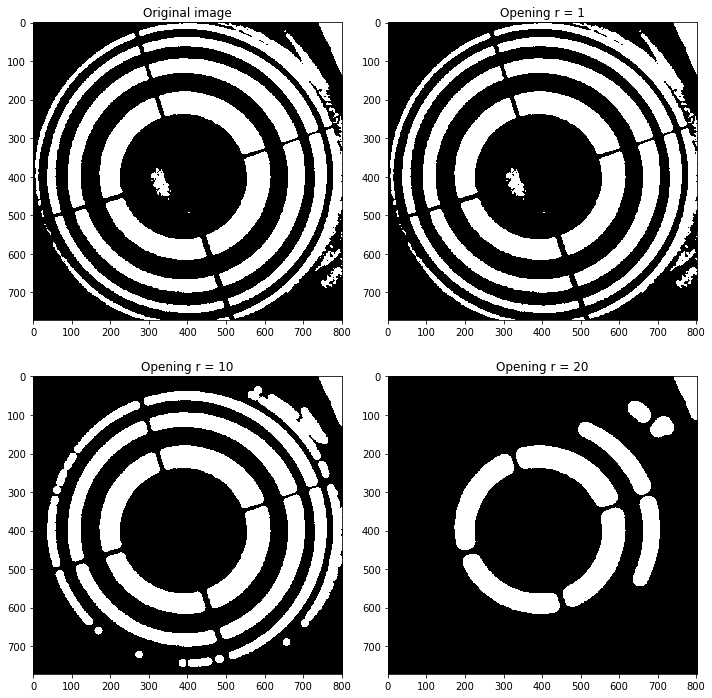

In [240]:
fc_opening01 = morphology.opening(fc_im, disk(1))
fc_opening10 = morphology.opening(fc_im, disk(10))
fc_opening20 = morphology.opening(fc_im, disk(20))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
subplot(2,2,1)
io.imshow(fc_im)
plt.title('Original image')
subplot(2,2,2)
io.imshow(fc_opening01)
plt.title('Opening r = 1')
subplot(2,2,3)
io.imshow(fc_opening10)
plt.title('Opening r = 10')
subplot(2,2,4)
io.imshow(fc_opening20)
plt.title('Opening r = 20')

** Q.1.4 Closing**

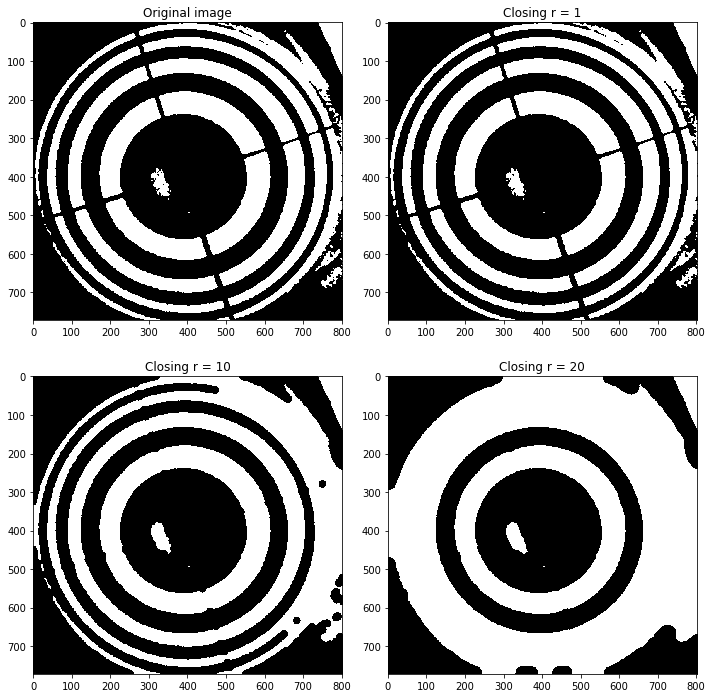

In [241]:
fc_closing01 = morphology.closing(fc_im, disk(1))
fc_closing10 = morphology.closing(fc_im, disk(10))
fc_closing20 = morphology.closing(fc_im, disk(20))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
subplot(2,2,1)
io.imshow(fc_im)
plt.title('Original image')
subplot(2,2,2)
io.imshow(fc_closing01)
plt.title('Closing r = 1')
subplot(2,2,3)
io.imshow(fc_closing10)
plt.title('Closing r = 10')
subplot(2,2,4)
io.imshow(fc_closing20)
plt.title('Closing r = 20')

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

Erosion is one of the basic morphological operators. Applied to an image, it results in the shrinkage of the white regions (in other words, it erodes away the boundaries) and the enlargement of the black areas. Dilation, on the other hand, performs the opposite - it expands the white areas while shrinking the black parts of an image. 
Opening and closing are both derived from the erosion and the dilation. 
Opening can be understood as a less destructive erosion, while closing resembles the less destructive dilation. 
Simply put, opening is an erosion followed by a dilation, whereas the closing is a dilation followed by an erosion (but using the same structuring element).
However, the exact result of all these operations depends on the structuring element applied. 

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

C:\Users\Mladen\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


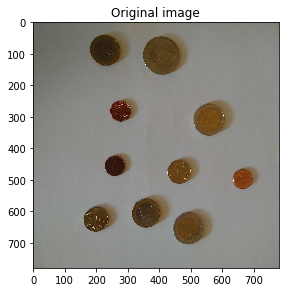

In [242]:
img_path = './images/'
img_name = 'coins.jpg'
coins_im = io.imread(img_path.__add__(img_name))

coins_im = img_as_ubyte(coins_im)
coins_im = rescale(coins_im, 0.25)
io.imshow(coins_im)
plt.title('Original image')

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

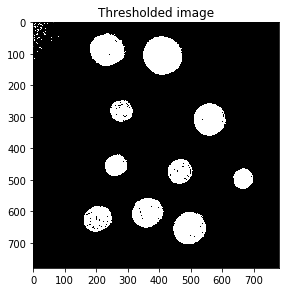

In [243]:
from skimage import filters

coins_bw = rgb2gray(coins_im)

th = filters.threshold_otsu(coins_bw)
coins_binary = coins_bw <= th

io.imshow(coins_binary)
plt.title('Thresholded image')

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

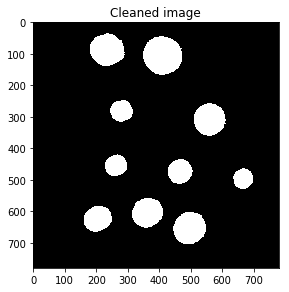

In [244]:
coins_ns = morphology.remove_small_objects(coins_binary, min_size=150)
coins_morph = morphology.closing(coins_ns, disk(3))
io.imshow(coins_morph)
plt.title('Cleaned image')

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


Number of coins detected:
10
Diameters of coins:
[106, 123, 70, 101, 69, 78, 63, 96, 85, 102]


C:\Users\Mladen\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


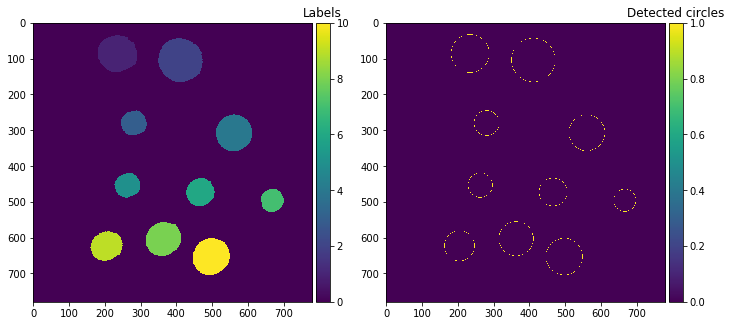

In [245]:
from skimage.measure import label
from skimage.measure import regionprops
from skimage.draw import circle_perimeter

coins_label, num_labels = label(coins_morph, connectivity = coins_morph.ndim, return_num = True)
props = regionprops(coins_label)
print('Number of coins detected:')
print(num_labels)

coin_diameters = [int(prop.equivalent_diameter) for prop in props]
coin_centroids = [prop.centroid for prop in props]
print('Diameters of coins:')
print(coin_diameters)

mask = np.zeros_like(coins_label)
for l in range(len(coin_centroids)):
    rr, cc = circle_perimeter(int(coin_centroids[l][0]),int(coin_centroids[l][1]),int(coin_diameters[l]/2))
    mask[rr,cc] = 1;

coins_circles = coins_label + mask    

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
subplot(2,2,1)
io.imshow(coins_label)
plt.title('Labels')
subplot(2,2,2)
io.imshow(mask)
plt.title('Detected circles')  

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

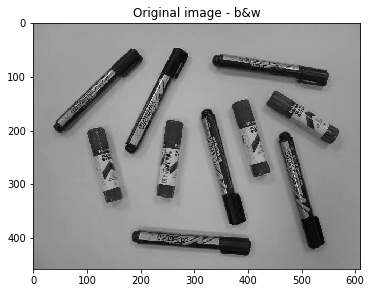

In [246]:
img_path = './images/'
img_name = 'objets4.jpg'
markers_im = io.imread(img_path.__add__(img_name))

markers_im = img_as_ubyte(markers_im)
markers_bw = rgb2gray(markers_im)
io.imshow(markers_bw)
plt.title('Original image - b&w')

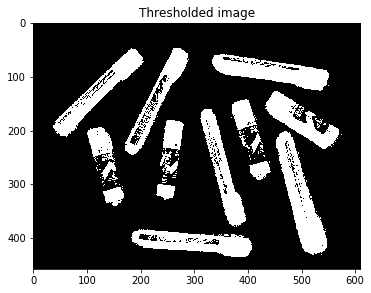

In [247]:
from skimage.filters import threshold_local

th = filters.threshold_yen(markers_bw)
markers_binary1 = markers_bw <= th

io.imshow(markers_binary1)
plt.title('Thresholded image')

C:\Users\Mladen\Anaconda3\lib\site-packages\skimage\morphology\misc.py:194: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  "Did you mean to use a boolean array?", UserWarning)


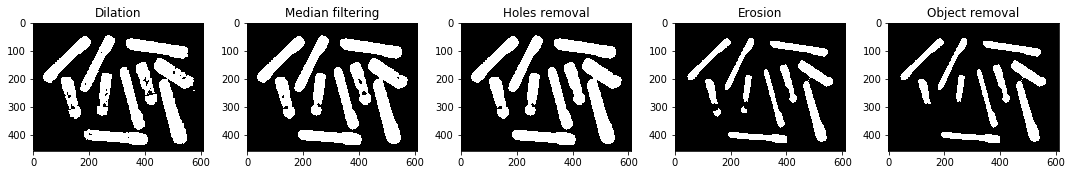

In [248]:
#dilation expands the white area while shrinking black parts
markers_ns1 = morphology.dilation(markers_binary1, rectangle(5,5))
#median is used to fill some of the small holes
markers_ns2 = filters.median(markers_ns1, disk(7))
#removal of the small holes is used for the bigger remaining holes
markers_ns3 = morphology.remove_small_holes(markers_ns2, min_size = 250)
#goal of the erosion is to disconnect the connected objects
markers_ns4 = morphology.erosion(markers_ns3, disk(8))
#finally, parts of the objects that got separated after the erosion are removed
markers_ns = morphology.remove_small_objects(markers_ns4, min_size = 750)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
subplot(1,5,1)
io.imshow(markers_ns1)
plt.title('Dilation')
subplot(1,5,2)
io.imshow(markers_ns2)
plt.title('Median filtering')  
subplot(1,5,3)
io.imshow(markers_ns3)
plt.title('Holes removal')  
subplot(1,5,4)
io.imshow(markers_ns4)
plt.title('Erosion')  
subplot(1,5,5)
io.imshow(markers_ns)
plt.title('Object removal')  

In [249]:
objects_label, num_labels = label(markers_ns, connectivity = markers_ns.ndim, return_num = True)
props = regionprops(objects_label)
print('Number of objects detected:')
print(num_labels)

#length of the major axis is used, since it is easy to distinguish markers from glues by their respective lengths
object_lengths = [int(prop.major_axis_length) for prop in props]
print('Major axis lengths of the objects:')
print(object_lengths)

Number of objects detected:
10
Major axis lengths of the objects:
[243, 240, 239, 155, 160, 250, 106, 102, 252, 247]


In [250]:
marker_lengths = 0
for i in range(len(object_lengths)):
    if object_lengths[i] > np.mean(object_lengths):
        marker_lengths = marker_lengths + 1
print('Number of markers detected:')
print(marker_lengths) 
print('Number of glues detected:')
print(num_labels - marker_lengths)
        

Number of markers detected:
6
Number of glues detected:
4
